In [1]:
from utils.plotter import get_roc_curves_from_df
from utils.wandb_calls import fetch_files_from_runs
import os
import pandas as pd
import pickle
import shutil

In [2]:
def append_row(table, row):
        return pd.concat([
                    table, 
                    pd.DataFrame([row], columns=row.index)]
            ).reset_index(drop=True)

2024-05-27 12:59:51.256797+00:00 2024-05-27 01:40:01.859141 44389.3976559639


False

In [6]:
project = "node_realism"
group = "acdc"
import wandb 
api = wandb.Api()
runs = api.runs(f"{project}")
df = pd.DataFrame(columns = ["run", "threshold", "score", "weights"])
for run in runs:
    # # run was created in past 2 hours, df = df_100 else df = df_510
    # if run.state == "finished" and "acdc" in run.group:
    #         case = int(run.group.split("_")[1])
    #         threshold = float(run.name)
    #         score = run.summary["score"]
    #         print(type(run.created_at), pd.Timestamp.now() - pd.Timedelta(hours=2))
    #         if run.created_at > pd.Timestamp.now() - pd.Timedelta(hours=2):
    #             entry = pd.Series({"run": case, "threshold": threshold, "score": score, "weights": 100})
    #         else:
    #             entry = pd.Series({"run": case, "threshold": threshold, "score": score, "weights": 510})
    #         df = append_row(df, entry)

    if "acdc" in run.group:
        case = int(run.group.split("_")[1])
        weights = int(run.group.split("_")[-1])
        threshold = float(run.name)
        score = run.summary["score"]
        entry = pd.Series({"run": case, "threshold": threshold, "score": score, "weights": weights})
        df = append_row(df, entry)

<class 'str'> 2024-05-27 11:55:01.859141


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

/Users/cybershiptrooper/src/interpretability/MATS/.iit/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


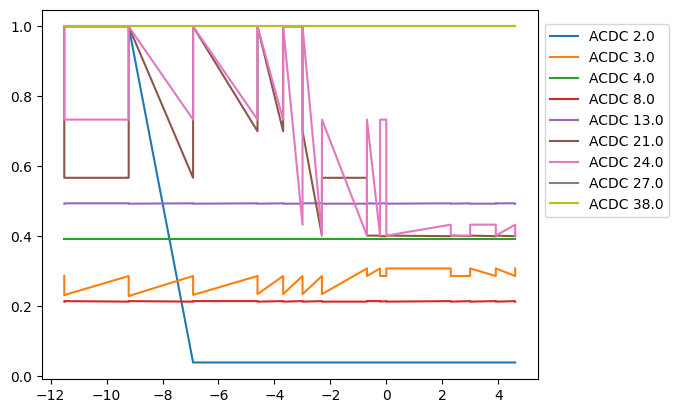

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_scores_for_weights(df, weights):
    for run, group in df[df["weights"] == weights].groupby("run"):
        group = group.sort_values("threshold")
        plt.plot(np.log(group["threshold"]),
                group["score"], 
                label=f"ACDC {run}")

    plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.7))

    plt.xlabel("log(Threshold)")
    plt.ylabel("Score")

    plt.show()

plot_scores_for_weights(df, 510)